In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [50]:
data = pd.read_csv('titanic.csv')


In [51]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


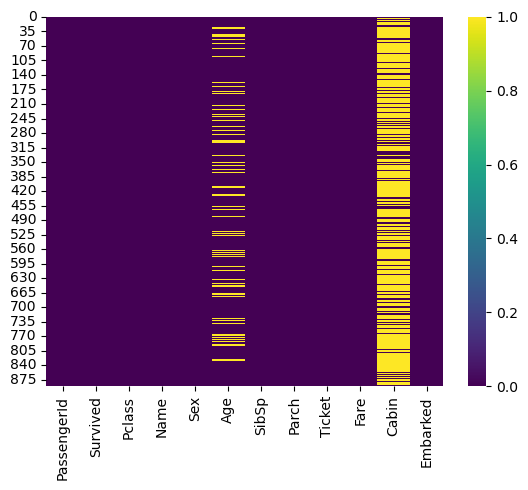

In [52]:
sns.heatmap(data.isnull(), cbar=True, cmap='viridis')
plt.show()

In [53]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data.drop(columns=['Cabin'], inplace=True)
data.dropna(subset=['Embarked'], inplace=True)

In [54]:
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

In [55]:
data['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [56]:
# Calculate the counts of each class
survival_counts = data['Survived'].value_counts()

# Calculate the proportions
proportions = survival_counts / survival_counts.sum()

print(survival_counts)
print(proportions)


0    549
1    340
Name: Survived, dtype: int64
0    0.617548
1    0.382452
Name: Survived, dtype: float64


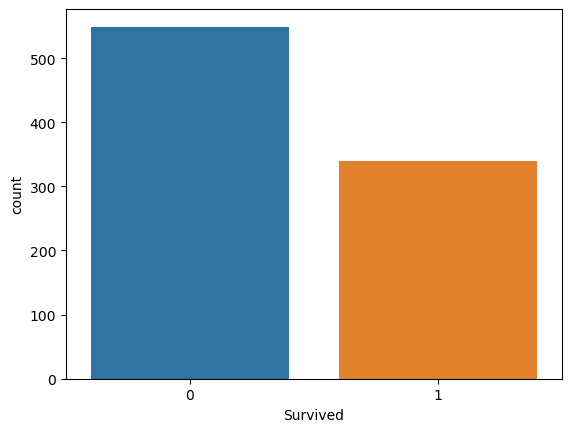

In [57]:
sns.countplot(x='Survived', data=data)
plt.show()


In [58]:
from sklearn.utils import resample

# Separate majority and minority classes
not_survived = data[data['Survived'] == 0]
survived = data[data['Survived'] == 1]

# Oversample minority class
survived_oversampled = resample(survived, 
                                 replace=True,      # Sample with replacement
                                 n_samples=549,     # Match majority class
                                 random_state=42)   # Reproducible results

# Combine majority class with oversampled minority class
data_balanced = pd.concat([not_survived, survived_oversampled])

# Shuffle the dataset
data_balanced = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


In [59]:
X = data_balanced[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]
y = data_balanced['Survived']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [61]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)


SVC()

In [63]:
y_pred = svm_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.87      0.85       169
           1       0.86      0.81      0.83       161

    accuracy                           0.84       330
   macro avg       0.84      0.84      0.84       330
weighted avg       0.84      0.84      0.84       330

[[147  22]
 [ 31 130]]


In [64]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 0.01, 0.001], 'kernel': ['rbf', 'linear']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)






Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.760 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.799 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.851 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.784 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.758 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.740 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.766 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.831 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.739 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.745 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.747 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 1/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.740 total time=   0.3s
[CV 2/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.766 total time=   0.7s
[CV 3/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.825 total time=   0.1s
[CV 4/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.752 total time=   0.2s
[CV 5/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.752 total time=   0.2s
[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.747 total time=   0.0s
[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.773 total time=   0.0s
[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.844 total time=   0.0s
[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.752 total time=   0.0s
[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.745 total time=   0.0s
[CV 1/5] END .C=100, gamma=0.001, kernel=linear;, score=0.740 total time=   0.3s
[CV 2/5] END .C=100, gamma=0.001, kernel=linear;, score=0.766 total time=   0.6s
[CV 3/5] END .C=100, gamma=0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [65]:
print(grid.best_params_)

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [66]:
grid

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [67]:
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       169
           1       0.86      0.81      0.83       161

    accuracy                           0.84       330
   macro avg       0.84      0.84      0.84       330
weighted avg       0.84      0.84      0.84       330

